In [10]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
# Yahtzee Training Analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Style settings
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Load training log
df = pd.read_csv('final_training_log.csv')

In [12]:
print("="*70)
print("TRAINING ANALYSIS")
print("="*70)
print(f"\nTotal Episodes: {len(df):,}")
print(f"Range: Episode {df['episode'].min()} to {df['episode'].max()}")
print(f"\nFirst few rows:")
print(df.head())
print("\nLast few rows:")
print(df.tail())

TRAINING ANALYSIS

Total Episodes: 50,000
Range: Episode 1 to 50000

First few rows:
   episode  score     reward  steps  epsilon  learning_rate  loss
0        1     80 -13.834286     44      1.0         0.0001   0.0
1        2     30 -21.358095     45      1.0         0.0001   0.0
2        3     37 -19.110476     43      1.0         0.0001   0.0
3        4     57 -18.443810     49      1.0         0.0001   0.0
4        5     37 -19.210476     46      1.0         0.0001   0.0

Last few rows:
       episode  score     reward  steps   epsilon  learning_rate      loss
49995    49996    197  11.934762     46  0.009999       0.000013  0.002135
49996    49997    156   6.922857     49  0.009999       0.000013  0.004173
49997    49998    147  -1.512857     47  0.009999       0.000013  0.018177
49998    49999    206  17.310952     47  0.009999       0.000013  0.006869
49999    50000    136  -4.950952     47  0.009999       0.000013  0.009960


In [13]:
# Basic stats
print("\n" + "="*70)
print("SCORE STATISTICS")
print("="*70)

print(f"\nOverall:")
print(f"  Mean: {df['score'].mean():.2f}")
print(f"  Median: {df['score'].median():.2f}")
print(f"  Std Dev: {df['score'].std():.2f}")
print(f"  Range: {df['score'].min()} - {df['score'].max()}")


SCORE STATISTICS

Overall:
  Mean: 143.14
  Median: 148.00
  Std Dev: 43.21
  Range: 10 - 274


In [14]:
# Last 1000 episodes
last_1000 = df.tail(1000)
print(f"\nLast 1000 episodes:")
print(f"  Mean: {last_1000['score'].mean():.2f}")
print(f"  Median: {last_1000['score'].median():.2f}")
print(f"  Std Dev: {last_1000['score'].std():.2f}")
print(f"  Range: {last_1000['score'].min()} - {last_1000['score'].max()}")

print(f"\nGames over threshold (last 1000):")
print(f"  >200: {(last_1000['score'] > 200).sum()} ({(last_1000['score'] > 200).sum()/10:.1f}%)")
print(f"  >250: {(last_1000['score'] > 250).sum()} ({(last_1000['score'] > 250).sum()/10:.1f}%)")
print(f"  >300: {(last_1000['score'] > 300).sum()} ({(last_1000['score'] > 300).sum()/10:.1f}%)")


Last 1000 episodes:
  Mean: 168.92
  Median: 173.00
  Std Dev: 29.71
  Range: 77 - 257

Games over threshold (last 1000):
  >200: 141 (14.1%)
  >250: 2 (0.2%)
  >300: 0 (0.0%)


In [15]:
# Training params
print("\n" + "="*70)
print("TRAINING PARAMETERS")
print("="*70)

print(f"\nEpsilon (decay rate = 0.9999):")
print(f"  Start: {df['epsilon'].iloc[0]:.4f}")
print(f"  End: {df['epsilon'].iloc[-1]:.4f}")

print(f"\nLearning Rate:")
print(f"  Start: {df['learning_rate'].iloc[0]:.6f}")
print(f"  End: {df['learning_rate'].iloc[-1]:.6f}")

print(f"\nLoss (non-zero episodes):")
print(f"  Overall avg: {df['loss'].mean():.6f}")
print(f"  Final 1000: {df['loss'].tail(1000).mean():.6f}")

print(f"\nReward:")
print(f"  First 1000: {df['reward'].head(1000).mean():.2f}")
print(f"  Last 1000: {df['reward'].tail(1000).mean():.2f}")


TRAINING PARAMETERS

Epsilon (decay rate = 0.9999):
  Start: 1.0000
  End: 0.0100

Learning Rate:
  Start: 0.000100
  End: 0.000013

Loss (non-zero episodes):
  Overall avg: 0.026086
  Final 1000: 0.009525

Reward:
  First 1000: -17.48
  Last 1000: 6.79



Saved: training_analysis.png


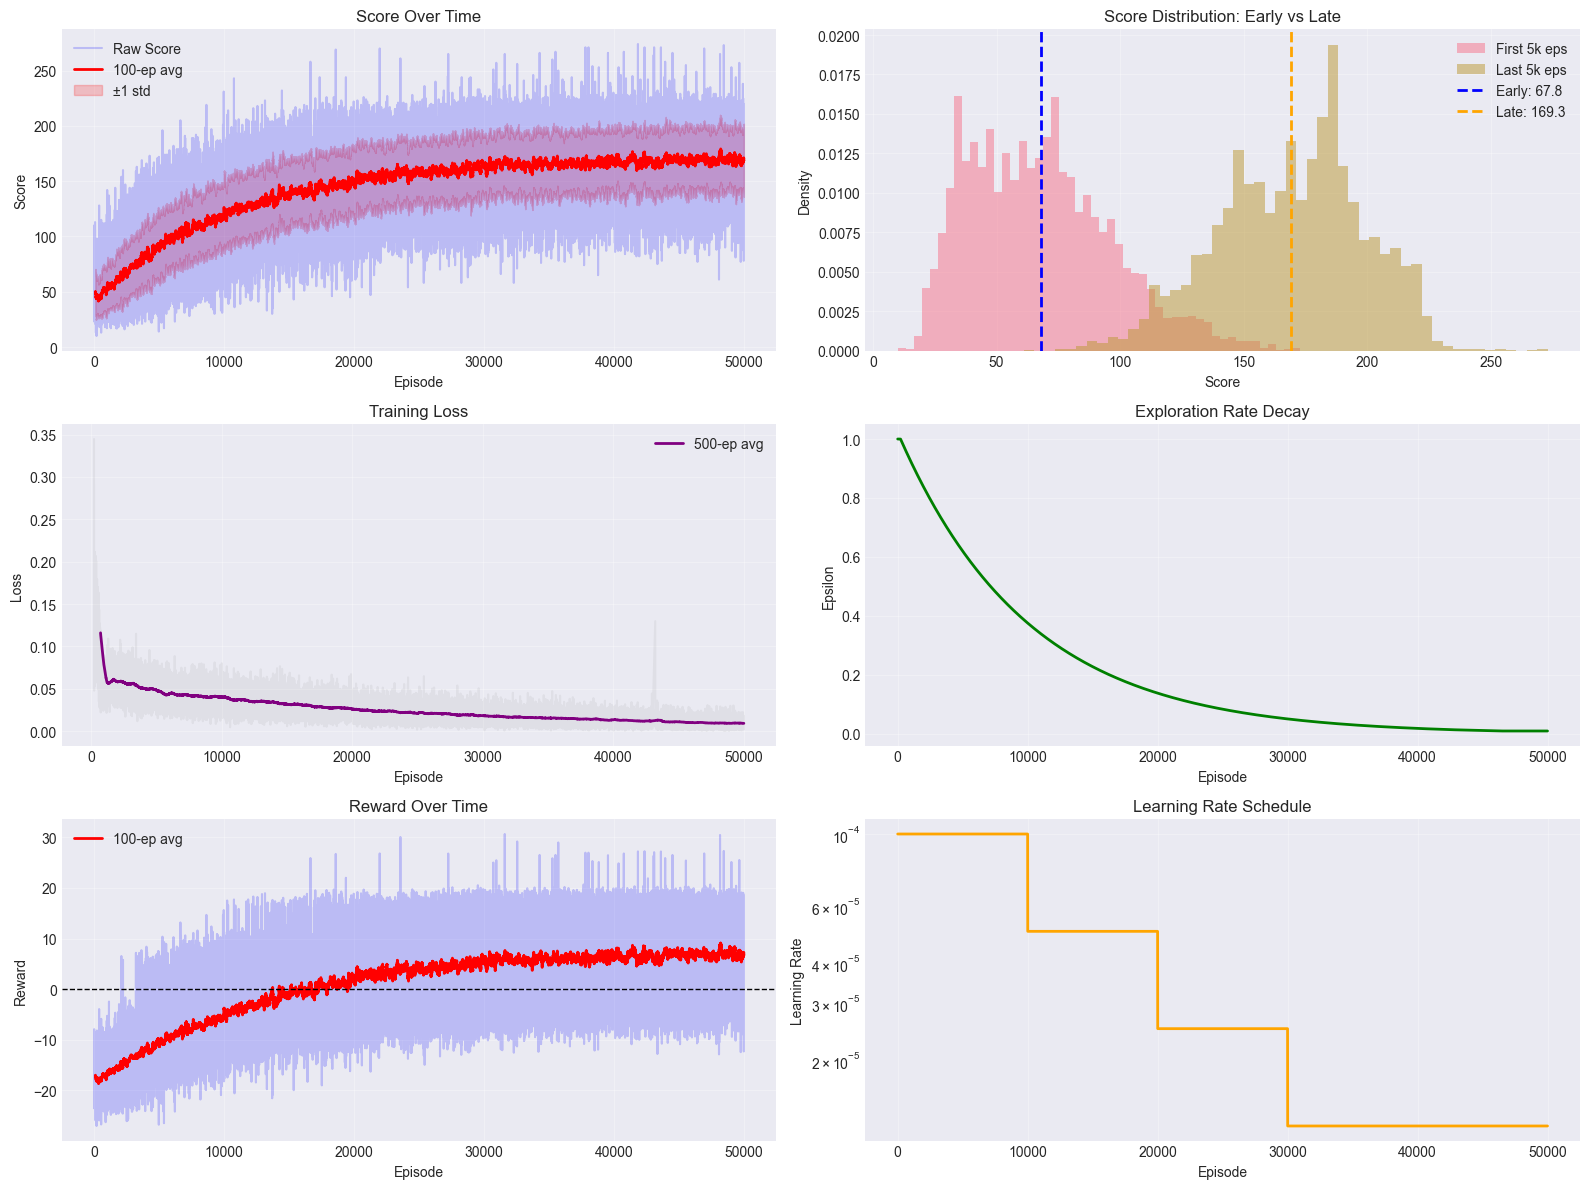

Saved: score_vs_loss.png


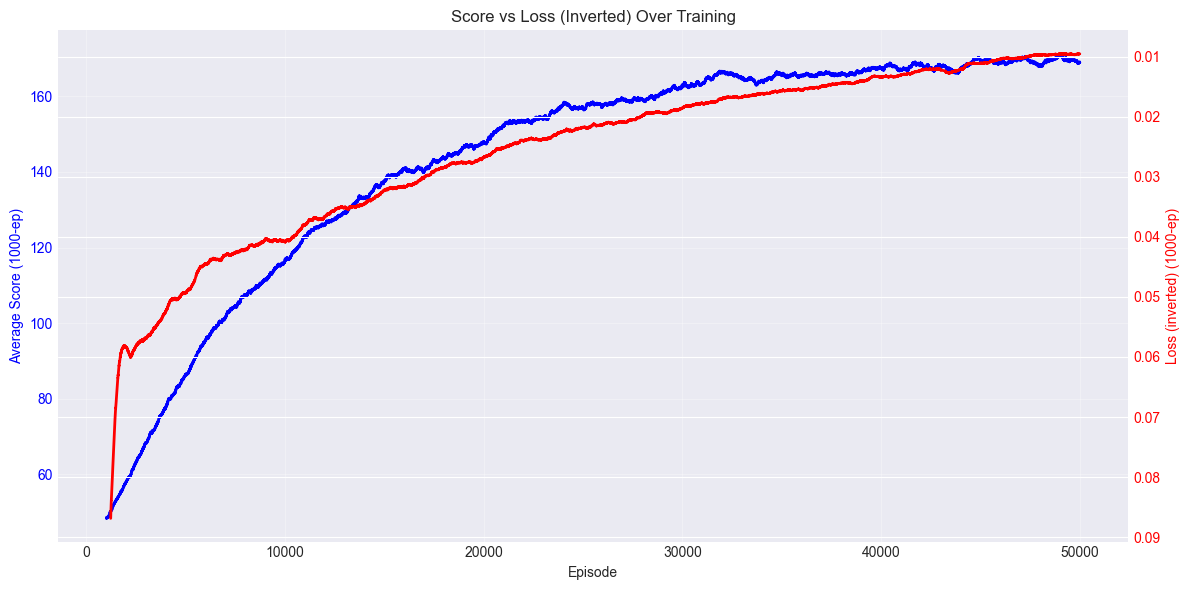


MILESTONES
  First 100+: Episode 11
  First 150+: Episode 2,104
  First 200+: Episode 6,647
  First 250+: Episode 16,651

CONVERGENCE

Performance by window:
   episodes  mean_score  std_score  mean_loss
     1-5000     67.8180  28.670962   0.058481
 5001-10000    106.6028  30.536128   0.042181
10001-15000    129.7578  30.882770   0.035284
15001-20000    143.8044  30.369765   0.028910
20001-25000    154.9400  29.268525   0.023411
25001-30000    159.9486  29.311161   0.019963
30001-35000    164.8574  28.914804   0.016666
35001-40000    166.2890  29.064150   0.014464
40001-45000    168.0770  29.395270   0.011625
45001-50000    169.2848  29.369055   0.009878

First quarter vs last quarter:
  First quarter mean: 94.79
  Last quarter mean: 168.34
  Improvement: 73.54
  T-statistic: -172.1008
  P-value: 0.00e+00
  Significant improvement detected

Saved: training_summary.csv

Done.


In [16]:
# Plots
fig = plt.figure(figsize=(16, 12))

# Score over time
ax1 = plt.subplot(3, 2, 1)
window = 100
rolling_mean = df['score'].rolling(window=window).mean()
rolling_std = df['score'].rolling(window=window).std()

ax1.plot(df['episode'], df['score'], alpha=0.2, color='blue', label='Raw Score')
ax1.plot(df['episode'], rolling_mean, color='red', linewidth=2, label=f'{window}-ep avg')
ax1.fill_between(df['episode'], rolling_mean - rolling_std, rolling_mean + rolling_std, 
                  alpha=0.2, color='red', label='±1 std')
ax1.set_xlabel('Episode')
ax1.set_ylabel('Score')
ax1.set_title('Score Over Time')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Score distribution comparison
ax2 = plt.subplot(3, 2, 2)
early = df['score'].head(5000)
late = df['score'].tail(5000)
ax2.hist(early, bins=50, alpha=0.5, label='First 5k eps', density=True)
ax2.hist(late, bins=50, alpha=0.5, label='Last 5k eps', density=True)
ax2.axvline(early.mean(), color='blue', linestyle='--', linewidth=2, label=f'Early: {early.mean():.1f}')
ax2.axvline(late.mean(), color='orange', linestyle='--', linewidth=2, label=f'Late: {late.mean():.1f}')
ax2.set_xlabel('Score')
ax2.set_ylabel('Density')
ax2.set_title('Score Distribution: Early vs Late')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Loss
ax3 = plt.subplot(3, 2, 3)
non_zero = df[df['loss'] > 0].copy()
if len(non_zero) > 0:
    loss_roll = non_zero['loss'].rolling(window=500).mean()
    ax3.plot(non_zero['episode'], non_zero['loss'], alpha=0.1, color='gray')
    ax3.plot(non_zero['episode'], loss_roll, color='purple', linewidth=2, label='500-ep avg')
    ax3.set_xlabel('Episode')
    ax3.set_ylabel('Loss')
    ax3.set_title('Training Loss')
    ax3.legend()
    ax3.grid(True, alpha=0.3)

# Epsilon
ax4 = plt.subplot(3, 2, 4)
ax4.plot(df['episode'], df['epsilon'], color='green', linewidth=2)
ax4.set_xlabel('Episode')
ax4.set_ylabel('Epsilon')
ax4.set_title('Exploration Rate Decay')
ax4.grid(True, alpha=0.3)

# Reward
ax5 = plt.subplot(3, 2, 5)
reward_roll = df['reward'].rolling(window=100).mean()
ax5.plot(df['episode'], df['reward'], alpha=0.2, color='blue')
ax5.plot(df['episode'], reward_roll, color='red', linewidth=2, label='100-ep avg')
ax5.axhline(y=0, color='black', linestyle='--', linewidth=1)
ax5.set_xlabel('Episode')
ax5.set_ylabel('Reward')
ax5.set_title('Reward Over Time')
ax5.legend()
ax5.grid(True, alpha=0.3)

# Learning rate
ax6 = plt.subplot(3, 2, 6)
ax6.plot(df['episode'], df['learning_rate'], color='orange', linewidth=2)
ax6.set_xlabel('Episode')
ax6.set_ylabel('Learning Rate')
ax6.set_title('Learning Rate Schedule')
ax6.set_yscale('log')
ax6.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('training_analysis.png', dpi=300, bbox_inches='tight')
print("\nSaved: training_analysis.png")
plt.show()

# Dual axis plot: Score vs Loss
fig, ax1 = plt.figure(figsize=(12, 6)), plt.gca()

# Score on left y-axis
ax1.set_xlabel('Episode')
ax1.set_ylabel('Average Score (1000-ep)', color='blue')
score_rolling = df['score'].rolling(window=1000).mean()
ax1.plot(df['episode'], score_rolling, color='blue', linewidth=2, label='Score')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True, alpha=0.3)

# Loss on right y-axis (inverted)
ax2 = ax1.twinx()
ax2.set_ylabel('Loss (inverted) (1000-ep)', color='red')
non_zero = df[df['loss'] > 0].copy()
loss_rolling = non_zero['loss'].rolling(window=1000).mean()
ax2.plot(non_zero['episode'], loss_rolling, color='red', linewidth=2, label='Loss')
ax2.invert_yaxis()  # Invert the axis
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Score vs Loss (Inverted) Over Training')
fig.tight_layout()
plt.savefig('score_vs_loss.png', dpi=300, bbox_inches='tight')
print("Saved: score_vs_loss.png")
plt.show()

# Milestones
print("\n" + "="*70)
print("MILESTONES")
print("="*70)

for milestone in [100, 150, 200, 250]:
    first = df[df['score'] >= milestone]['episode'].min()
    if pd.notna(first):
        print(f"  First {milestone}+: Episode {first:,}")
    else:
        print(f"  First {milestone}+: Not reached")

# Check improvement significance
print("\n" + "="*70)
print("CONVERGENCE")
print("="*70)

window_size = 5000
windows = []
for i in range(0, len(df), window_size):
    chunk = df.iloc[i:i+window_size]
    if len(chunk) >= 1000:
        windows.append({
            'episodes': f"{chunk['episode'].min()}-{chunk['episode'].max()}",
            'mean_score': chunk['score'].mean(),
            'std_score': chunk['score'].std(),
            'mean_loss': chunk['loss'].mean()
        })

if windows:
    print("\nPerformance by window:")
    print(pd.DataFrame(windows).to_string(index=False))

first_q = df['score'].head(len(df)//4)
last_q = df['score'].tail(len(df)//4)
t_stat, p_val = stats.ttest_ind(first_q, last_q)
print(f"\nFirst quarter vs last quarter:")
print(f"  First quarter mean: {first_q.mean():.2f}")
print(f"  Last quarter mean: {last_q.mean():.2f}")
print(f"  Improvement: {last_q.mean() - first_q.mean():.2f}")
print(f"  T-statistic: {t_stat:.4f}")
print(f"  P-value: {p_val:.2e}")
if p_val < 0.05:
    print(f"  Significant improvement detected")

# Save summary
summary = {
    'total_episodes': len(df),
    'final_mean': last_1000['score'].mean(),
    'final_median': last_1000['score'].median(),
    'final_std': last_1000['score'].std(),
    'final_max': last_1000['score'].max(),
    'over_200': (last_1000['score'] > 200).sum(),
    'over_250': (last_1000['score'] > 250).sum(),
    'improvement': last_q.mean() - first_q.mean(),
    'final_epsilon': df['epsilon'].iloc[-1],
    'final_lr': df['learning_rate'].iloc[-1]
}

pd.DataFrame([summary]).to_csv('training_summary.csv', index=False)
print("\nSaved: training_summary.csv")
print("\nDone.")